In [1]:
import os
import sys
sys.path.append('/home/yang_liu/python_workspace/gaussian-splatting-lightning')

import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plyfile import PlyData, PlyElement

In [6]:
file_dir = '../data/matrix_city/aerial/point_cloud_ds20/aerial/Block_all.ply'
plydata = PlyData.read(file_dir)
data = plydata.elements[0].data
data_pd = pd.DataFrame(data)
data_np = np.zeros(data_pd.shape, dtype=np.float32)
property_names = data[0].dtype.names
for i, name in enumerate(property_names):
    data_np[:, i] = data_pd[name]

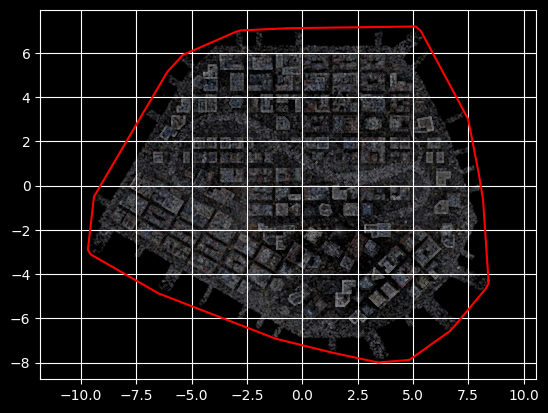

In [23]:
from scipy.spatial import ConvexHull
filtered_pcd = data_np[data_np[:, 2] > 0.0]
hull = ConvexHull(filtered_pcd[:, :2], 'Qg')
hull_list=hull.vertices.tolist()

plt.figure()
plt.scatter(filtered_pcd[::100, 0], filtered_pcd[::100, 1], s=0.01, c=filtered_pcd[::100, 6:9] / 255.0)
plt.plot(filtered_pcd[hull_list + [hull_list[0]], 0], filtered_pcd[hull_list + [hull_list[0]], 1], 'r-')
plt.grid()
plt.axis('equal')
plt.show()

In [28]:
for idx in hull_list:
    print(f"[ {filtered_pcd[idx, 0]}, {filtered_pcd[idx, 1]}, 0.0 ],")

[ 8.416661262512207, -4.294362545013428, 0.0 ],
[ 8.17249584197998, -0.6456990242004395, 0.0 ],
[ 7.984864234924316, 0.5024458765983582, 0.0 ],
[ 7.497599124908447, 3.0053467750549316, 0.0 ],
[ 5.368646621704102, 6.973334312438965, 0.0 ],
[ 5.130746364593506, 7.192911148071289, 0.0 ],
[ -0.6429359912872314, 7.114381790161133, 0.0 ],
[ -2.7949936389923096, 7.013523578643799, 0.0 ],
[ -2.9842920303344727, 6.961159706115723, 0.0 ],
[ -5.398324966430664, 5.904831886291504, 0.0 ],
[ -6.104296684265137, 5.135859966278076, 0.0 ],
[ -9.414912223815918, -0.49712905287742615, 0.0 ],
[ -9.687925338745117, -2.849135160446167, 0.0 ],
[ -9.688793182373047, -2.904560089111328, 0.0 ],
[ -9.565393447875977, -3.1094472408294678, 0.0 ],
[ -6.489808559417725, -4.876441478729248, 0.0 ],
[ -1.205599069595337, -6.918439865112305, 0.0 ],
[ 1.2643184661865234, -7.52800989151001, 0.0 ],
[ 1.3284523487091064, -7.543353080749512, 0.0 ],
[ 3.4247231483459473, -7.9952778816223145, 0.0 ],
[ 3.4956560134887695, -7.98